<a href="https://colab.research.google.com/github/ZahraShahlaie/Facial-emotion-recognition-with-Keras-Applications/blob/main/Facial_emotion_recognition_with_Keras_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Important and helpful sites**

How to oversample image dataset using Python


https://stackoverflow.com/questions/48532069/how-to-oversample-image-dataset-using-python


## prepare dataset

**install kaggle**

In [1]:
!pip install kaggle

**import libraries**

In [2]:
import os
import PIL
import cv2
import time
import shutil
import random
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from imblearn.over_sampling import RandomOverSampler



**in this steup u should import kaggle.json file**



**read kaggle.json file**

In [3]:
!chmod 600 /content/kaggle.json

In [4]:
os.environ['KAGGLE_USERNAME']= 'zsh1999'
os.environ['KAGGLE_KEY']= '542959e4345bec7e802457964bbb42d8'


**download dataset**

In [5]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset --force

Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset
License(s): unknown
 94% 113M/121M [00:01<00:00, 96.1MB/s] 
100% 121M/121M [00:01<00:00, 88.8MB/s]


**Extract the downloaded file**

In [6]:
import zipfile

# Replace 'path_to_zip_file.zip' with the actual path to your downloaded ZIP file
zip_file_path = '/content/face-expression-recognition-dataset.zip'

# Replace 'extracted_folder' with the desired name for the extracted folder
extracted_folder = '/content/Data'

# Create the target directory if it doesn't exist
import os
os.makedirs(extracted_folder, exist_ok=True)

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

print("ZIP file extracted successfully.")


ZIP file extracted successfully.


# **preprocessing Dataset**

In [7]:
!rm -r /content/Data/images/images

In [8]:
# Define the directory paths for the training and validation image datasets.
data_train_dir ='/content/Data/images/train'
data_valid_dir = '/content/Data/images/validation'

# **handling imbalanced data**

**Report from the count of images in train data**



In [9]:
class_folder_names = []
num_images_in_folder = []

for class_folder in os.listdir(data_train_dir):
    class_folder_path = os.path.join(data_train_dir, class_folder)
    # Ensure the item in the directory is indeed a folder
    if os.path.isdir(class_folder_path):

     # List the files in the class folder
      files = os.listdir(class_folder_path)

      # Calculate how many files in each folder train set
      num_of_pic_in_folder = int(len(files))
      class_folder_names.append(class_folder)
      num_images_in_folder.append(num_of_pic_in_folder)

**Create the barplot**

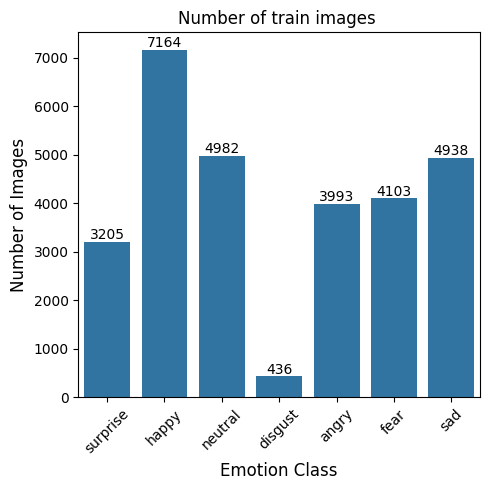

In [10]:
# Create the barplot
plt.figure(figsize=(5, 5))
ax = sns.barplot(x=class_folder_names, y=num_images_in_folder, order=class_folder_names)

# Add annotations above each bar
for i, v in enumerate(num_images_in_folder):
    ax.text(i, v + 50, str(v), color='black', ha='center', fontsize=10)

plt.xlabel('Emotion Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Number of train images ', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**handling imbalanced  train data set**

In [11]:
x_images = []
y_labels = []

for class_folder in os.listdir(data_train_dir):
    class_folder_path = os.path.join(data_train_dir, class_folder)
    for file_name in os.listdir(class_folder_path):
        file_path = os.path.join(class_folder_path, file_name)

        # read images
        img = cv2.imread(file_path)

        # Add image to image list
        x_images.append(img)

        # Add labels to labels list
        y_labels.append(class_folder)

x_images = np.array(x_images)
y_labels = np.array(y_labels)

#reshape x_images for preparing use in RandomOverSampler
x_images_reshaped = x_images.reshape(x_images.shape[0], -1)

ros = RandomOverSampler(sampling_strategy="not majority")

X_train_resampled, y_train_resampled = ros.fit_resample(x_images_reshaped, y_labels)

#reshape X_train_resampled
X_train_resampled = X_train_resampled.reshape(-1,48,48,3)

#print shapes
print(f"X_train_resampled : {X_train_resampled.shape}")
print(f"y_train_resampled : {y_train_resampled.shape}")


X_train_resampled : (50148, 48, 48, 3)
y_train_resampled : (50148,)


#----------------------------------------------------------------------------------------------------

**Report from the count of images in validation data**

In [12]:
class_folder_names = []
num_images_in_folder = []

for class_folder in os.listdir(data_valid_dir):
    class_folder_path = os.path.join(data_valid_dir, class_folder)

    # Ensure the item in the directory is indeed a folder
    if os.path.isdir(class_folder_path):

     # List the files in the class folder
      files = os.listdir(class_folder_path)

      # Calculate how many files in each folder train set
      num_of_pic_in_folder = int(len(files))
      class_folder_names.append(class_folder)
      num_images_in_folder.append(num_of_pic_in_folder)


**Create the barplot**

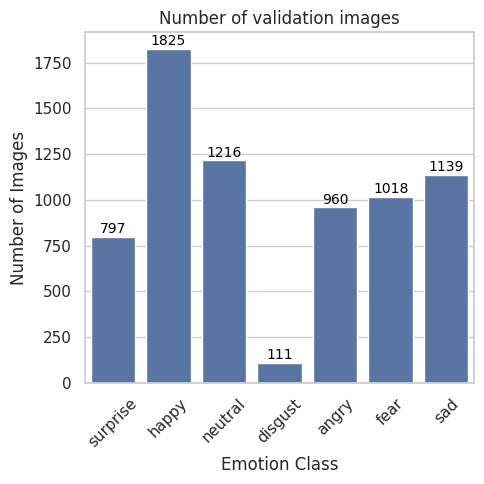

In [13]:
# Create the barplot
plt.figure(figsize=(5, 5))
sns.set(style="whitegrid")
ax = sns.barplot(x=class_folder_names, y=num_images_in_folder, order=class_folder_names)

# Add annotations above each bar
for i, v in enumerate(num_images_in_folder):
    ax.text(i, v + 20, str(v), color='black', ha='center', fontsize=10)

plt.xlabel('Emotion Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Number of validation images', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**handling imbalanced  validation dataset**

In [14]:

x_images = []
y_labels = []

for class_folder in os.listdir(data_valid_dir):
    class_folder_path = os.path.join(data_valid_dir, class_folder)
    for file_name in os.listdir(class_folder_path):
        file_path = os.path.join(class_folder_path, file_name)

        # read images
        img = cv2.imread(file_path)

        # Add image to image list
        x_images.append(img)

        # Add labels to labels list
        y_labels.append(class_folder)

x_images = np.array(x_images)
y_labels = np.array(y_labels)

#reshape x_images for preparing use in RandomOverSampler
x_images_reshaped = x_images.reshape(x_images.shape[0], -1)

ros = RandomOverSampler(sampling_strategy="not majority")

X_val_resampled, y_val_resampled = ros.fit_resample(x_images_reshaped, y_labels)

#reshape y_val_resampled
X_val_resampled = X_val_resampled.reshape(-1,48,48,3)

#print shapes
print(f"X_val_resampled : {X_val_resampled.shape}")
print(f"y_val_resampled : {y_val_resampled.shape}")


X_val_resampled : (12775, 48, 48, 3)
y_val_resampled : (12775,)


## **create dataset**

**X_train_resampled, y_train_resampled, X_val_resampled, y_val_resampled is ready for create a tensorflow dataset**

**LabelEncoder**

In [15]:
label_encoder = LabelEncoder()

y_train_resampled_encode = label_encoder.fit_transform(y_train_resampled)

y_val_resampled_encode = label_encoder.transform(y_val_resampled)


In [16]:
# Split a portion of training data for testing (10% of the training data)
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled_encode, test_size=0.1, random_state=42)

# Create a TensorFlow Dataset for training
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.shuffle(buffer_size=len(X_train), seed=42).batch(32)

# Create a TensorFlow Dataset for validation
val_ds = tf.data.Dataset.from_tensor_slices((X_val_resampled, y_val_resampled_encode))
val_ds = val_ds.shuffle(buffer_size=len(X_val_resampled), seed=42).batch(32)

# Create a TensorFlow Dataset for testing
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_ds = test_ds.shuffle(buffer_size=len(X_test), seed=42).batch(32)



**Configure the dataset for performance**

In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

**pint length of train ds and val ds an test ds**

In [18]:
print("Train dataset size:", len(X_train))
print("Validation dataset size:", len(X_val_resampled))
print("Test dataset size:", len(X_test))


Train dataset size: 45133
Validation dataset size: 12775
Test dataset size: 5015


**count of each class**

In [19]:
unique_classes_train, counts_train = np.unique(y_train, return_counts=True)
unique_classes_val, counts_val = np.unique(y_val_resampled, return_counts=True)
unique_classes_test, counts_test = np.unique(y_test, return_counts=True)

for class_id, count_train, count_val ,count_test in zip(unique_classes_val, counts_train,counts_val , counts_test):
    print(f"Class {class_id}: {count_train} samples in the training dataset, {count_val} in validation ,{count_test} in test ")


Class angry: 6435 samples in the training dataset, 1825 in validation ,729 in test 
Class disgust: 6444 samples in the training dataset, 1825 in validation ,720 in test 
Class fear: 6456 samples in the training dataset, 1825 in validation ,708 in test 
Class happy: 6414 samples in the training dataset, 1825 in validation ,750 in test 
Class neutral: 6463 samples in the training dataset, 1825 in validation ,701 in test 
Class sad: 6431 samples in the training dataset, 1825 in validation ,733 in test 
Class surprise: 6490 samples in the training dataset, 1825 in validation ,674 in test 


**shows some images**



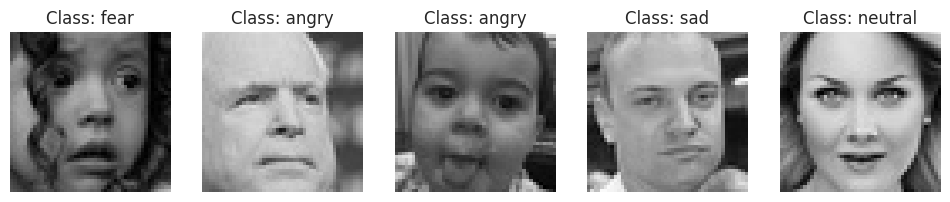

In [20]:
# number of images that shows
num_samples_to_display = 5

# Choose random images
random_indices = np.random.randint(0, len(X_train_resampled), num_samples_to_display)
random_images = X_train_resampled[random_indices]
random_labels = y_train_resampled[random_indices]

# Display images and labels
plt.figure(figsize=(12, 6))
for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(random_images[i])
    plt.title(f"Class: {random_labels[i]}")
    plt.axis("off")
plt.show()


**show labels**

In [21]:
class_names = np.unique(y_train_resampled)
class_names_length = len(class_names)
print(class_names)
print(class_names_length)


['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
7


In [22]:
# Define constants
batch_size = 32
image_size = (48, 48)



**data_augmentation**

In [23]:
# Data augmentation
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.1),
    layers.RandomRotation(0.1),


  ]
)


# constant

In [24]:
initial_epochs= 10

fine_tune_epochs= 60

total_epochs =  initial_epochs + fine_tune_epochs

base_learning_rate = 0.0001

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            verbose=1)

### 1. VGG16

In [25]:
# Add preprocess_input
preprocess_input_vgg16 = tf.keras.applications.vgg16.preprocess_input

#Create the base model from the pre-trained convnets
VGG16_pretrained_model = tf.keras.applications.VGG16(
    weights="imagenet",
    input_shape=( 48, 48, 3),
    include_top=False
)
#Freeze the convolutional base
VGG16_pretrained_model.trainable = False


# Compelete Model
model_vgg16 = Sequential([
    Lambda(data_augmentation, input_shape=(48, 48, 3)),
    Lambda(preprocess_input_vgg16),
    VGG16_pretrained_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(class_names_length, activation='softmax')
    ])

#compile pre trained model
model_vgg16.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history_vgg16 = model_vgg16.fit(train_ds,
                    validation_data=val_ds,
                    epochs=initial_epochs,
                    callbacks=[callback],
                    verbose = 1)


58889256/58889256 [==============================] - 1s 0us/step
Epoch 1/10
1411/1411 [==============================] - 31s 17ms/step - loss: 7.5112 - accuracy: 0.1812 - val_loss: 2.3633 - val_accuracy: 0.2035
Epoch 2/10
1411/1411 [==============================] - 23s 16ms/step - loss: 2.1953 - accuracy: 0.1848 - val_loss: 1.9905 - val_accuracy: 0.2110
Epoch 3/10
1411/1411 [==============================] - 24s 17ms/step - loss: 1.9844 - accuracy: 0.1886 - val_loss: 1.9124 - val_accuracy: 0.2359
Epoch 4/10
1411/1411 [==============================] - 24s 17ms/step - loss: 1.9308 - accuracy: 0.1984 - val_loss: 1.8640 - val_accuracy: 0.2552
Epoch 5/10
1411/1411 [==============================] - 25s 18ms/step - loss: 1.8940 - accuracy: 0.2162 - val_loss: 1.8329 - val_accuracy: 0.2584
Epoch 6/10
1411/1411 [==============================] - 25s 18ms/step - loss: 1.8736 - accuracy: 0.2247 - val_loss: 1.8050 - val_accuracy: 0.2802
Epoch 7/10
1411/1411 [==============================] - 24s

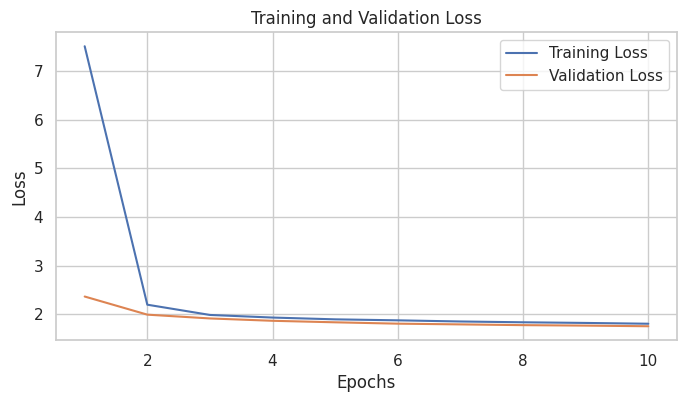

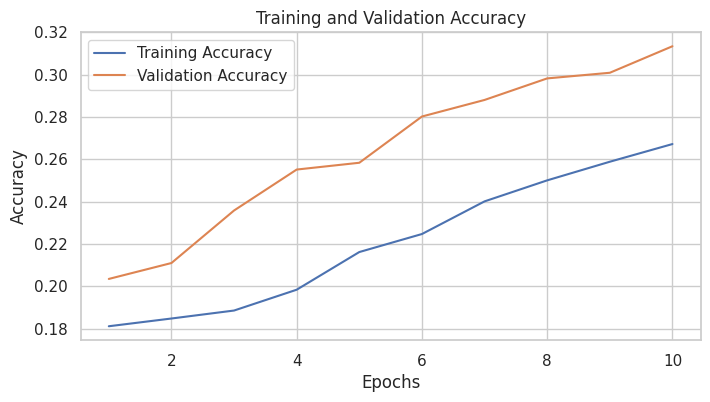

In [26]:
train_loss = history_vgg16.history['loss']
val_loss = history_vgg16.history['val_loss']

# Retrieve performance metrics
train_accuracy = history_vgg16.history['accuracy']
val_accuracy = history_vgg16.history['val_accuracy']

# number of epochs
epochs = range(1, len(train_loss) + 1)

# Draw the loss graph
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Draw the accuracy graph
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Fine Tune**


In [27]:

VGG16_pretrained_model.trainable = True

#see how many layers are in VGG16_pretrained_model
print(len(VGG16_pretrained_model.layers),"layers in VGG16_pretrained_model " )



19 layers in VGG16_pretrained_model 


In [28]:

# Fine-tune from this layer onwards
fine_tune_at = 9

# Freeze all the layers before the `fine_tune_at` layer
for layer in VGG16_pretrained_model.layers[:fine_tune_at]:
  layer.trainable = False

#compile
model_vgg16.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Fit Model
history_vgg16_fine = model_vgg16.fit(train_ds,
                         validation_data=val_ds,
                         epochs=total_epochs,
                         initial_epoch=history_vgg16.epoch[-1],
                         callbacks=[callback],
                         verbose=1
                         )

Epoch 10/70
1411/1411 [==============================] - 53s 35ms/step - loss: 1.7214 - accuracy: 0.3180 - val_loss: 1.5224 - val_accuracy: 0.4367
Epoch 11/70
1411/1411 [==============================] - 48s 34ms/step - loss: 1.5419 - accuracy: 0.4075 - val_loss: 1.3815 - val_accuracy: 0.4875
Epoch 12/70
1411/1411 [==============================] - 49s 35ms/step - loss: 1.4288 - accuracy: 0.4611 - val_loss: 1.3386 - val_accuracy: 0.5006
Epoch 13/70
1411/1411 [==============================] - 51s 36ms/step - loss: 1.3263 - accuracy: 0.5022 - val_loss: 1.2888 - val_accuracy: 0.5281
Epoch 14/70
1411/1411 [==============================] - 50s 35ms/step - loss: 1.2559 - accuracy: 0.5280 - val_loss: 1.2720 - val_accuracy: 0.5450
Epoch 15/70
1411/1411 [==============================] - 49s 35ms/step - loss: 1.1951 - accuracy: 0.5481 - val_loss: 1.2972 - val_accuracy: 0.5525
Epoch 16/70
1411/1411 [==============================] - 49s 35ms/step - loss: 1.1492 - accuracy: 0.5714 - val_loss: 1

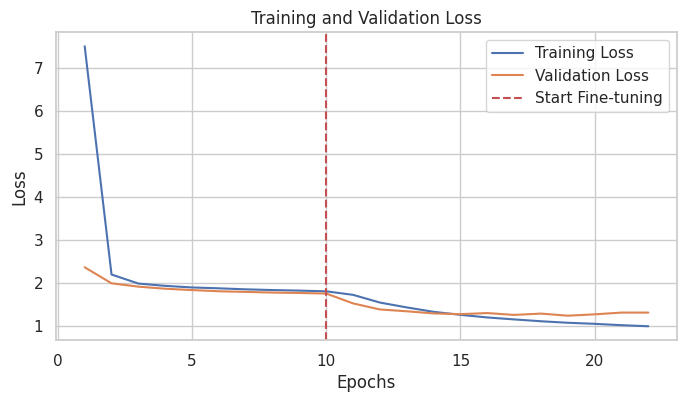

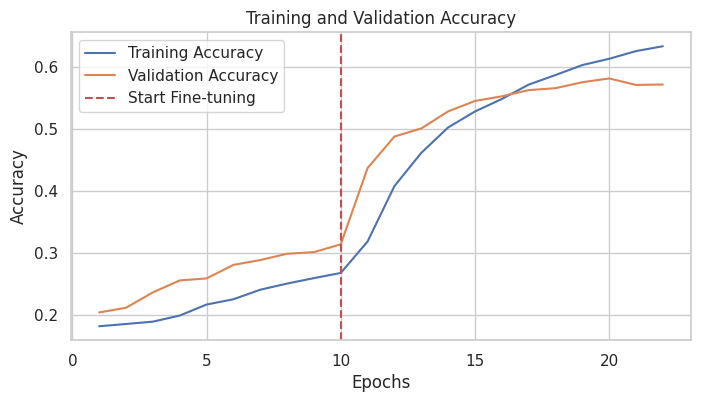

In [29]:
# Combine training and validation loss
train_loss_fine = history_vgg16_fine.history['loss']
val_loss_fine = history_vgg16_fine.history['val_loss']
train_loss_combined = train_loss + train_loss_fine
val_loss_combined = val_loss + val_loss_fine

# Combine training and validation accuracy
train_accuracy_fine = history_vgg16_fine.history['accuracy']
val_accuracy_fine = history_vgg16_fine.history['val_accuracy']
train_accuracy_combined = train_accuracy + train_accuracy_fine
val_accuracy_combined = val_accuracy + val_accuracy_fine

# Number of epochs for both stages
total_epochs = len(train_loss_combined)
fine_tune_epoch = len(train_loss)

# Draw the combined loss graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, total_epochs + 1), train_loss_combined, label='Training Loss')
plt.plot(range(1, total_epochs + 1), val_loss_combined, label='Validation Loss')
plt.axvline(fine_tune_epoch, color='r', linestyle='--', label='Start Fine-tuning')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Draw the combined accuracy graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, total_epochs + 1), train_accuracy_combined, label='Training Accuracy')
plt.plot(range(1, total_epochs + 1), val_accuracy_combined, label='Validation Accuracy')
plt.axvline(fine_tune_epoch, color='r', linestyle='--', label='Start Fine-tuning')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### 2. VGG19

In [30]:
# Add preprocess_input
preprocess_input_vgg19 = tf.keras.applications.vgg19.preprocess_input

#Create the base model from the pre-trained convnets
VGG19_pretrained_model = tf.keras.applications.VGG19(
    weights="imagenet",
    input_shape=( 48, 48, 3),
    include_top=False
)
#Freeze the convolutional base
VGG19_pretrained_model.trainable = False


# Compelete Model
model_vgg19 = Sequential([
    Lambda(data_augmentation, input_shape=(48, 48, 3)),
    Lambda(preprocess_input_vgg19),
    VGG19_pretrained_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(class_names_length, activation='softmax')
])

#compile pre trained model
model_vgg19.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#fit pre trained model
history_vgg19 = model_vgg19.fit(train_ds,
                    validation_data=val_ds,
                    epochs=initial_epochs,
                    callbacks=[callback],
                    verbose = 1)


80134624/80134624 [==============================] - 1s 0us/step
Epoch 1/10
1411/1411 [==============================] - 32s 21ms/step - loss: 7.3416 - accuracy: 0.1753 - val_loss: 2.2400 - val_accuracy: 0.2022
Epoch 2/10
1411/1411 [==============================] - 30s 21ms/step - loss: 2.1216 - accuracy: 0.1808 - val_loss: 1.9545 - val_accuracy: 0.2088
Epoch 3/10
1411/1411 [==============================] - 29s 21ms/step - loss: 1.9633 - accuracy: 0.1909 - val_loss: 1.9031 - val_accuracy: 0.2259
Epoch 4/10
1411/1411 [==============================] - 29s 20ms/step - loss: 1.9243 - accuracy: 0.1955 - val_loss: 1.8809 - val_accuracy: 0.2400
Epoch 5/10
1411/1411 [==============================] - 30s 21ms/step - loss: 1.8972 - accuracy: 0.2077 - val_loss: 1.8579 - val_accuracy: 0.2516
Epoch 6/10
1411/1411 [==============================] - 30s 21ms/step - loss: 1.8766 - accuracy: 0.2152 - val_loss: 1.8442 - val_accuracy: 0.2511
Epoch 7/10
1411/1411 [==============================] - 30s

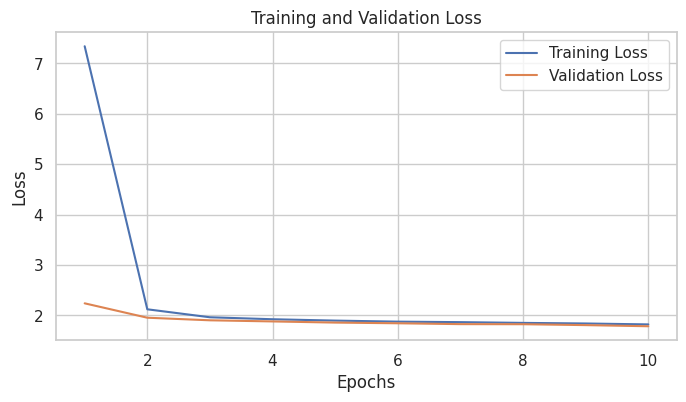

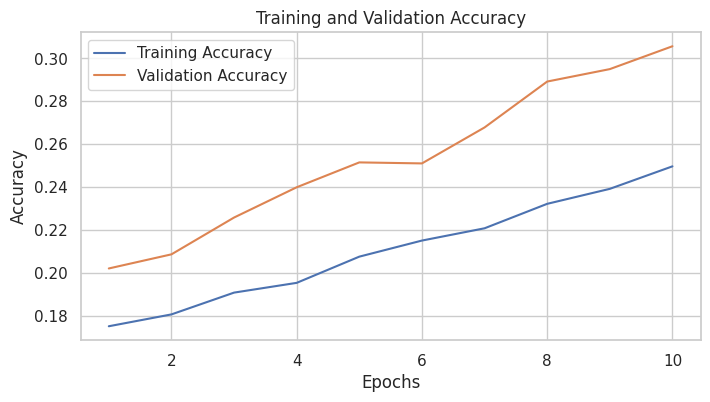

In [31]:
train_loss = history_vgg19.history['loss']
val_loss = history_vgg19.history['val_loss']

# Retrieve performance metrics
train_accuracy = history_vgg19.history['accuracy']
val_accuracy = history_vgg19.history['val_accuracy']

# number of epochs
epochs = range(1, len(train_loss) + 1)

# Draw the loss graph
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Draw the accuracy graph
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Fine Tune**


In [32]:

VGG19_pretrained_model.trainable = True

#see how many layers are in VGG19_pretrained_model
print(len(VGG19_pretrained_model.layers),"layers in VGG19_pretrained_model " )


22 layers in VGG19_pretrained_model 


In [33]:

# Fine-tune from this layer onwards
fine_tune_at = 12

# Freeze all the layers before the `fine_tune_at` layer
for layer in VGG19_pretrained_model.layers[:fine_tune_at]:
  layer.trainable = False

#compile fine tune model
model_vgg19.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Fit fine tune model
history_vgg19_fine = model_vgg19.fit(train_ds,
                         validation_data=val_ds,
                         epochs=total_epochs,
                         initial_epoch=history_vgg19.epoch[-1],
                         callbacks=[callback],
                          verbose=1
                         )



Epoch 10/22
1411/1411 [==============================] - 63s 43ms/step - loss: 1.7469 - accuracy: 0.3013 - val_loss: 1.5583 - val_accuracy: 0.4099
Epoch 11/22
1411/1411 [==============================] - 61s 43ms/step - loss: 1.5561 - accuracy: 0.4031 - val_loss: 1.4110 - val_accuracy: 0.4772
Epoch 12/22
1411/1411 [==============================] - 61s 43ms/step - loss: 1.4232 - accuracy: 0.4625 - val_loss: 1.3160 - val_accuracy: 0.5114
Epoch 13/22
1411/1411 [==============================] - 61s 43ms/step - loss: 1.3219 - accuracy: 0.5022 - val_loss: 1.3133 - val_accuracy: 0.5342
Epoch 14/22
1411/1411 [==============================] - 61s 43ms/step - loss: 1.2497 - accuracy: 0.5320 - val_loss: 1.3058 - val_accuracy: 0.5512
Epoch 15/22
1411/1411 [==============================] - 66s 47ms/step - loss: 1.1964 - accuracy: 0.5513 - val_loss: 1.2587 - val_accuracy: 0.5555
Epoch 16/22
1411/1411 [==============================] - 66s 47ms/step - loss: 1.1477 - accuracy: 0.5721 - val_loss: 1

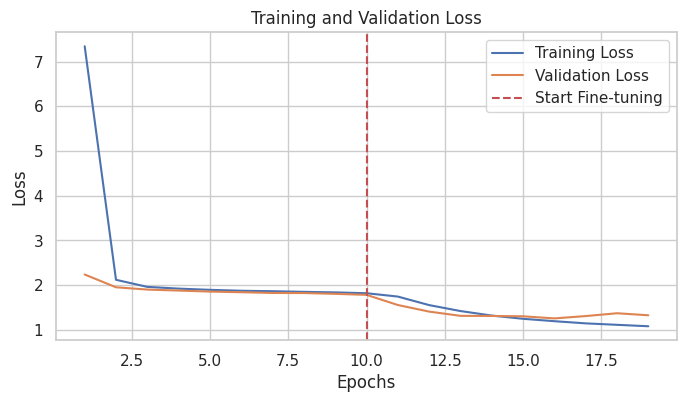

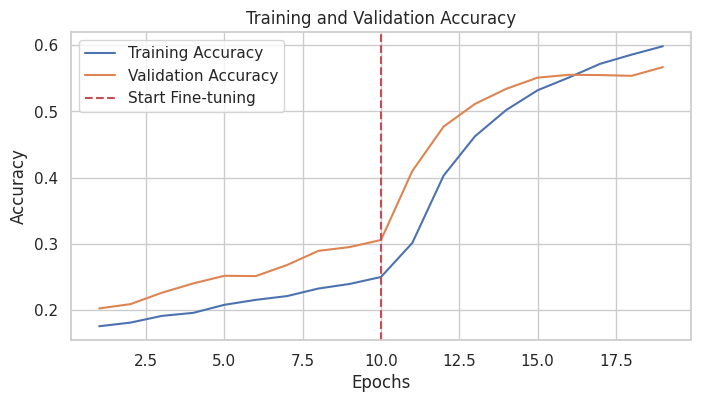

In [34]:
# Combine training and validation loss
train_loss_fine = history_vgg19_fine.history['loss']
val_loss_fine = history_vgg19_fine.history['val_loss']
train_loss_combined = train_loss + train_loss_fine
val_loss_combined = val_loss + val_loss_fine

# Combine training and validation accuracy
train_accuracy_fine = history_vgg19_fine.history['accuracy']
val_accuracy_fine = history_vgg19_fine.history['val_accuracy']
train_accuracy_combined = train_accuracy + train_accuracy_fine
val_accuracy_combined = val_accuracy + val_accuracy_fine

# Number of epochs for both stages
total_epochs = len(train_loss_combined)
fine_tune_epoch = len(train_loss)

# Draw the combined loss graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, total_epochs + 1), train_loss_combined, label='Training Loss')
plt.plot(range(1, total_epochs + 1), val_loss_combined, label='Validation Loss')
plt.axvline(fine_tune_epoch, color='r', linestyle='--', label='Start Fine-tuning')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Draw the combined accuracy graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, total_epochs + 1), train_accuracy_combined, label='Training Accuracy')
plt.plot(range(1, total_epochs + 1), val_accuracy_combined, label='Validation Accuracy')
plt.axvline(fine_tune_epoch, color='r', linestyle='--', label='Start Fine-tuning')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### 3. ResNet50

In [35]:
# Add preprocess_input
preprocess_input_resnet50 = tf.keras.applications.resnet50.preprocess_input


#Create the base model from the pre-trained convnets
ResNet50_pretrained_model =tf.keras.applications.ResNet50(
    weights="imagenet",
    input_shape=( 48, 48, 3),
    include_top=False
)

#Freeze the convolutional base
ResNet50_pretrained_model.trainable = False


# Compelete Model
model_resNet50 = Sequential([
    Lambda(data_augmentation, input_shape=(48, 48, 3)),
    Lambda(preprocess_input_resnet50),
    ResNet50_pretrained_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(class_names_length, activation='softmax')
])

#compile pre trained model
model_resNet50.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#fit pre trained model
history_resNet50 = model_resNet50.fit(train_ds,
                    validation_data=val_ds,
                    epochs=initial_epochs,
                    callbacks=[callback],
                    verbose = 1)


94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/10
1411/1411 [==============================] - 36s 21ms/step - loss: 1.9744 - accuracy: 0.2350 - val_loss: 1.7463 - val_accuracy: 0.3132
Epoch 2/10
1411/1411 [==============================] - 28s 20ms/step - loss: 1.7903 - accuracy: 0.2869 - val_loss: 1.6954 - val_accuracy: 0.3479
Epoch 3/10
1411/1411 [==============================] - 28s 20ms/step - loss: 1.7410 - accuracy: 0.3138 - val_loss: 1.6444 - val_accuracy: 0.3675
Epoch 4/10
1411/1411 [==============================] - 28s 20ms/step - loss: 1.7057 - accuracy: 0.3336 - val_loss: 1.6393 - val_accuracy: 0.3767
Epoch 5/10
1411/1411 [==============================] - 27s 19ms/step - loss: 1.6819 - accuracy: 0.3448 - val_loss: 1.6239 - val_accuracy: 0.3843
Epoch 6/10
1411/1411 [==============================] - 27s 19ms/step - loss: 1.6673 - accuracy: 0.3532 - val_loss: 1.6037 - val_accuracy: 0.3966
Epoch 7/10
1411/1411 [==============================] - 27s

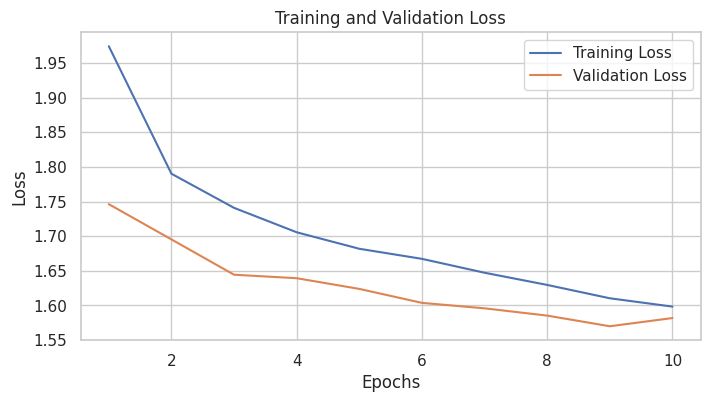

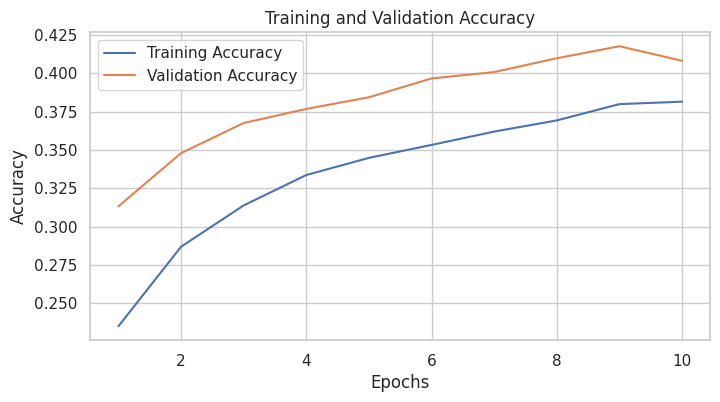

In [36]:
train_loss = history_resNet50.history['loss']
val_loss = history_resNet50.history['val_loss']

# Retrieve performance metrics
train_accuracy = history_resNet50.history['accuracy']
val_accuracy = history_resNet50.history['val_accuracy']

# number of epochs
epochs = range(1, len(train_loss) + 1)

# Draw the loss graph
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Draw the accuracy graph
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Fine Tune**

In [37]:
ResNet50_pretrained_model.trainable = True

#see how many layers are in ResNet50_pretrained_model
print(len(ResNet50_pretrained_model.layers),"layers in ResNet50_pretrained_model " )



175 layers in ResNet50_pretrained_model 


In [38]:

# Fine-tune from this layer onwards
fine_tune_at = 165

# Freeze all the layers before the `fine_tune_at` layer
for layer in ResNet50_pretrained_model.layers[:fine_tune_at]:
  layer.trainable = False

# compile fine tune model
model_resNet50.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Fit fine tune model
history_resNet50_fine = model_resNet50.fit(train_ds,
                         validation_data=val_ds,
                         epochs=total_epochs,
                         initial_epoch=history_resNet50.epoch[-1],
                         callbacks=[callback],
                          verbose=1
                         )



Epoch 10/19
1411/1411 [==============================] - 41s 24ms/step - loss: 1.6137 - accuracy: 0.3752 - val_loss: 1.5913 - val_accuracy: 0.4075
Epoch 11/19
1411/1411 [==============================] - 32s 23ms/step - loss: 1.5856 - accuracy: 0.3888 - val_loss: 1.5811 - val_accuracy: 0.4178
Epoch 12/19
1411/1411 [==============================] - 31s 22ms/step - loss: 1.5612 - accuracy: 0.4011 - val_loss: 1.5684 - val_accuracy: 0.4218
Epoch 13/19
1411/1411 [==============================] - 31s 22ms/step - loss: 1.5346 - accuracy: 0.4138 - val_loss: 1.5635 - val_accuracy: 0.4297
Epoch 14/19
1411/1411 [==============================] - 31s 22ms/step - loss: 1.5215 - accuracy: 0.4183 - val_loss: 1.5579 - val_accuracy: 0.4322
Epoch 15/19
1411/1411 [==============================] - 31s 22ms/step - loss: 1.5004 - accuracy: 0.4259 - val_loss: 1.5666 - val_accuracy: 0.4357
Epoch 16/19
1411/1411 [==============================] - 31s 22ms/step - loss: 1.4825 - accuracy: 0.4321 - val_loss: 1

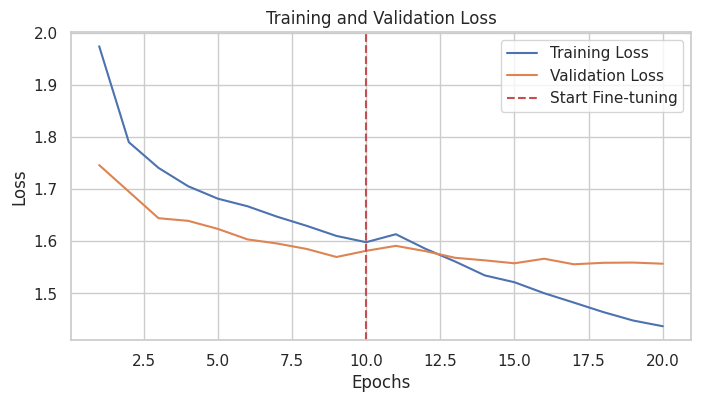

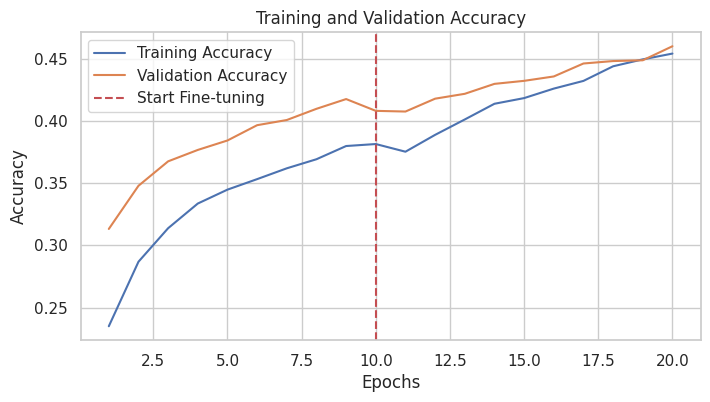

In [39]:
# Combine training and validation loss
train_loss_fine = history_resNet50_fine.history['loss']
val_loss_fine = history_resNet50_fine.history['val_loss']
train_loss_combined = train_loss + train_loss_fine
val_loss_combined = val_loss + val_loss_fine

# Combine training and validation accuracy
train_accuracy_fine = history_resNet50_fine.history['accuracy']
val_accuracy_fine = history_resNet50_fine.history['val_accuracy']
train_accuracy_combined = train_accuracy + train_accuracy_fine
val_accuracy_combined = val_accuracy + val_accuracy_fine

# Number of epochs for both stages
total_epochs = len(train_loss_combined)
fine_tune_epoch = len(train_loss)

# Draw the combined loss graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, total_epochs + 1), train_loss_combined, label='Training Loss')
plt.plot(range(1, total_epochs + 1), val_loss_combined, label='Validation Loss')
plt.axvline(fine_tune_epoch, color='r', linestyle='--', label='Start Fine-tuning')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Draw the combined accuracy graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, total_epochs + 1), train_accuracy_combined, label='Training Accuracy')
plt.plot(range(1, total_epochs + 1), val_accuracy_combined, label='Validation Accuracy')
plt.axvline(fine_tune_epoch, color='r', linestyle='--', label='Start Fine-tuning')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### 4. MobileNetV2

In [40]:
# Add preprocess_input
preprocess_input_mobilenet_v2 = tf.keras.applications.mobilenet_v2.preprocess_input

#Create the base model from the pre-trained convnets
MobileNetV2_pretrained_model =tf.keras.applications.MobileNetV2(
    weights="imagenet",
    input_shape=( 48, 48, 3),
    include_top=False
)

#Freeze the convolutional base
MobileNetV2_pretrained_model.trainable = False


# Compelete Model
model_mobileNetV2 = Sequential([
    Lambda(data_augmentation, input_shape=(48, 48, 3)),
    Lambda(preprocess_input_mobilenet_v2),
    MobileNetV2_pretrained_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(class_names_length, activation='softmax')
])

#compile pre trained model
model_mobileNetV2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#fit pre trained model
history_mobileNetV2 = model_mobileNetV2.fit(train_ds,
                    validation_data=val_ds,
                    epochs=initial_epochs,
                    callbacks=[callback],
                    verbose = 1)


9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
1411/1411 [==============================] - 22s 13ms/step - loss: 1.9354 - accuracy: 0.2349 - val_loss: 1.7890 - val_accuracy: 0.2729
Epoch 2/10
1411/1411 [==============================] - 16s 12ms/step - loss: 1.8031 - accuracy: 0.2788 - val_loss: 1.7376 - val_accuracy: 0.3096
Epoch 3/10
1411/1411 [==============================] - 17s 12ms/step - loss: 1.7643 - accuracy: 0.3043 - val_loss: 1.7131 - val_accuracy: 0.3252
Epoch 4/10
1411/1411 [==============================] - 19s 14ms/step - loss: 1.7355 - accuracy: 0.3193 - val_loss: 1.6837 - val_accuracy: 0.3357
Epoch 5/10
1411/1411 [==============================] - 15s 11ms/step - loss: 1.7126 - accuracy: 0.3304 - val_loss: 1.6703 - val_accuracy: 0.3466
Epoch 6/10
1411/1411 [==============================] - 19s 13ms/step - loss: 1.6870 - accuracy: 0.3416 - val_loss: 1.6604 - val_accuracy: 0.3493
Epoch 7/10
1411/1411 [==============================] - 16s 1

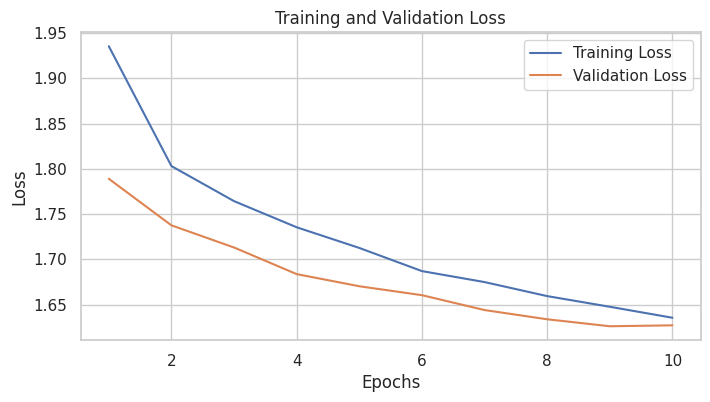

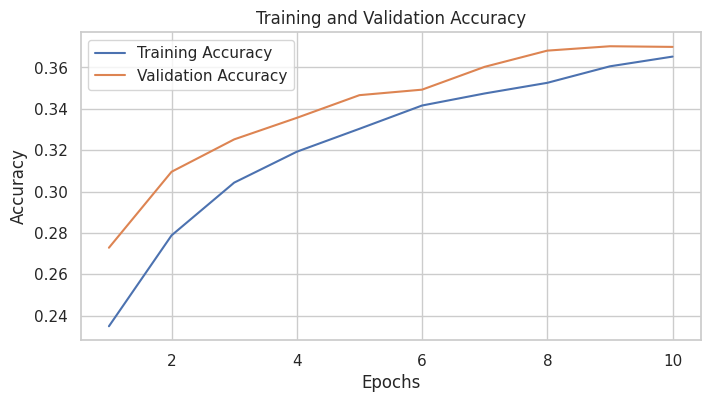

In [41]:
train_loss = history_mobileNetV2.history['loss']
val_loss = history_mobileNetV2.history['val_loss']

# Retrieve performance metrics
train_accuracy = history_mobileNetV2.history['accuracy']
val_accuracy = history_mobileNetV2.history['val_accuracy']

# number of epochs
epochs = range(1, len(train_loss) + 1)

# Draw the loss graph
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Draw the accuracy graph
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Fine Tune**

In [42]:

MobileNetV2_pretrained_model.trainable = True

#see how many layers are in MobileNetV2_pretrained_model
print(len(MobileNetV2_pretrained_model.layers),"layers in MobileNetV2_pretrained_model " )



154 layers in MobileNetV2_pretrained_model 


In [43]:

# Fine-tune from this layer onwards
fine_tune_at = 144

# Freeze all the layers before the `fine_tune_at` layer
for layer in MobileNetV2_pretrained_model.layers[:fine_tune_at]:
  layer.trainable = False

# compile fine tune Model
model_mobileNetV2.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Fit fine tune Model
history_mobileNetV2_fine = model_mobileNetV2.fit(train_ds,
                         validation_data=val_ds,
                         epochs=total_epochs,
                         initial_epoch=history_mobileNetV2.epoch[-1],
                         callbacks=[callback],
                          verbose=1
                         )



Epoch 10/20
1411/1411 [==============================] - 23s 13ms/step - loss: 1.8864 - accuracy: 0.2641 - val_loss: 1.7290 - val_accuracy: 0.3150
Epoch 11/20
1411/1411 [==============================] - 18s 13ms/step - loss: 1.7999 - accuracy: 0.2913 - val_loss: 1.7264 - val_accuracy: 0.3233
Epoch 12/20
1411/1411 [==============================] - 17s 12ms/step - loss: 1.7632 - accuracy: 0.3063 - val_loss: 1.7130 - val_accuracy: 0.3395
Epoch 13/20
1411/1411 [==============================] - 18s 13ms/step - loss: 1.7331 - accuracy: 0.3237 - val_loss: 1.6945 - val_accuracy: 0.3472
Epoch 14/20
1411/1411 [==============================] - 19s 13ms/step - loss: 1.7155 - accuracy: 0.3291 - val_loss: 1.6864 - val_accuracy: 0.3591
Epoch 15/20
1411/1411 [==============================] - 18s 13ms/step - loss: 1.6997 - accuracy: 0.3399 - val_loss: 1.6774 - val_accuracy: 0.3629
Epoch 16/20
1411/1411 [==============================] - 17s 12ms/step - loss: 1.6903 - accuracy: 0.3421 - val_loss: 1

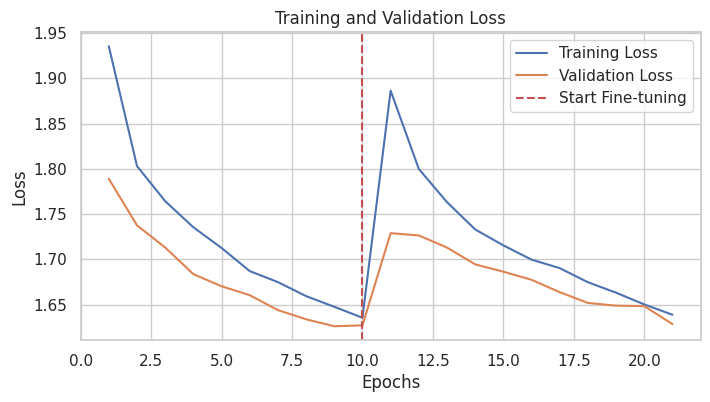

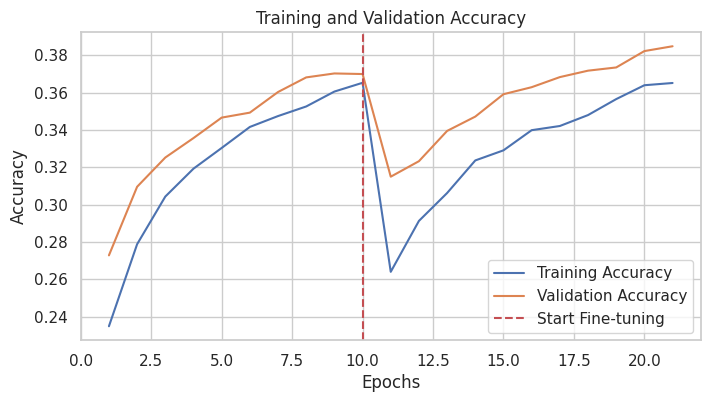

In [44]:
# Combine training and validation loss
train_loss_fine = history_mobileNetV2_fine.history['loss']
val_loss_fine = history_mobileNetV2_fine.history['val_loss']
train_loss_combined = train_loss + train_loss_fine
val_loss_combined = val_loss + val_loss_fine

# Combine training and validation accuracy
train_accuracy_fine = history_mobileNetV2_fine.history['accuracy']
val_accuracy_fine = history_mobileNetV2_fine.history['val_accuracy']
train_accuracy_combined = train_accuracy + train_accuracy_fine
val_accuracy_combined = val_accuracy + val_accuracy_fine

# Number of epochs for both stages
total_epochs = len(train_loss_combined)
fine_tune_epoch = len(train_loss)

# Draw the combined loss graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, total_epochs + 1), train_loss_combined, label='Training Loss')
plt.plot(range(1, total_epochs + 1), val_loss_combined, label='Validation Loss')
plt.axvline(fine_tune_epoch, color='r', linestyle='--', label='Start Fine-tuning')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Draw the combined accuracy graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, total_epochs + 1), train_accuracy_combined, label='Training Accuracy')
plt.plot(range(1, total_epochs + 1), val_accuracy_combined, label='Validation Accuracy')
plt.axvline(fine_tune_epoch, color='r', linestyle='--', label='Start Fine-tuning')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



### 5. MY Model

In [45]:
my_model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(1024, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(class_names_length, activation='softmax' )
])

my_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_my_model = my_model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=60,
                    callbacks = [callback],
                    verbose = 1)

Epoch 1/60
1411/1411 [==============================] - 38s 24ms/step - loss: 1.8709 - accuracy: 0.2282 - val_loss: 1.6821 - val_accuracy: 0.3553
Epoch 2/60
1411/1411 [==============================] - 34s 24ms/step - loss: 1.6281 - accuracy: 0.3731 - val_loss: 1.4387 - val_accuracy: 0.4557
Epoch 3/60
1411/1411 [==============================] - 33s 24ms/step - loss: 1.4537 - accuracy: 0.4485 - val_loss: 1.3292 - val_accuracy: 0.5004
Epoch 4/60
1411/1411 [==============================] - 34s 24ms/step - loss: 1.3426 - accuracy: 0.4967 - val_loss: 1.2450 - val_accuracy: 0.5410
Epoch 5/60
1411/1411 [==============================] - 34s 24ms/step - loss: 1.2639 - accuracy: 0.5256 - val_loss: 1.2038 - val_accuracy: 0.5539
Epoch 6/60
1411/1411 [==============================] - 34s 24ms/step - loss: 1.1923 - accuracy: 0.5540 - val_loss: 1.2285 - val_accuracy: 0.5519
Epoch 7/60
1411/1411 [==============================] - 33s 24ms/step - loss: 1.1465 - accuracy: 0.5692 - val_loss: 1.1827 -

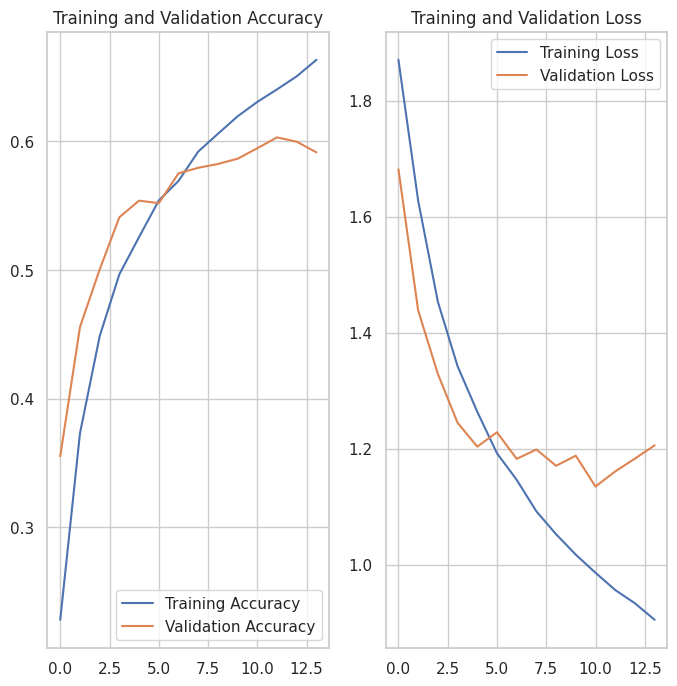

In [47]:
acc = history_my_model.history['accuracy']
val_acc = history_my_model.history['val_accuracy']

loss = history_my_model.history['loss']
val_loss = history_my_model.history['val_loss']

epochs_range = range(14)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##Evaluate

In [48]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model(model, test_ds):
    results = model.evaluate(test_ds, verbose=0)
    loss = results[0]
    acc = results[1]

    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))



    # Extract the actual labels from the test dataset
    # Extract the prediction labels from the test dataset

    y_pred = []
    y_true = []

    for batch_images, batch_labels in test_ds:
       y_true.extend(batch_labels)
       batch_predictions = model.predict(batch_images)
       batch_pred_labels = np.argmax(batch_predictions, axis=1)
       y_pred.extend(batch_pred_labels)


    #creat confusion matrix
    confusion = confusion_matrix(y_true, y_pred)


    #plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    classification_rep = classification_report(y_true, y_pred, target_names=class_names)
    print("Classification Report:\n", classification_rep)

    return acc

#### 1. VGG16

    Test Loss: 0.94260
Test Accuracy: 64.51%
1/1 [==============================] - 0s 174ms/step


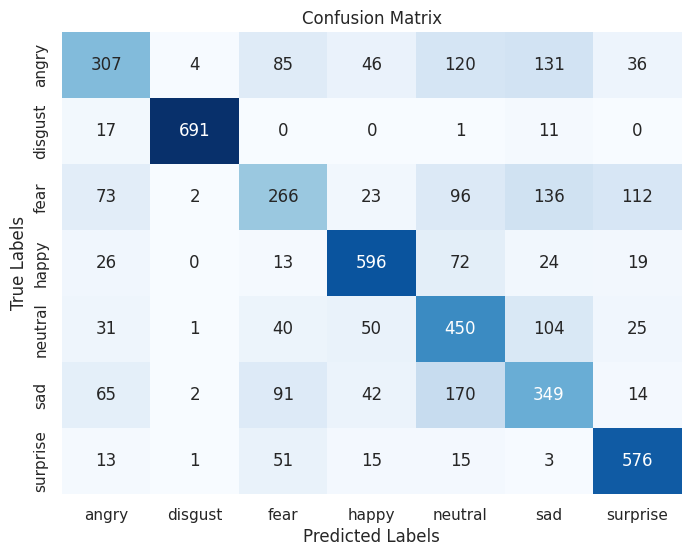

Classification Report:
               precision    recall  f1-score   support

       angry       0.58      0.42      0.49       729
     disgust       0.99      0.96      0.97       720
        fear       0.49      0.38      0.42       708
       happy       0.77      0.79      0.78       750
     neutral       0.49      0.64      0.55       701
         sad       0.46      0.48      0.47       733
    surprise       0.74      0.85      0.79       674

    accuracy                           0.65      5015
   macro avg       0.64      0.65      0.64      5015
weighted avg       0.64      0.65      0.64      5015



In [49]:
acc_vgg16=evaluate_model(model_vgg16, test_ds)


###2 . VGG19

    Test Loss: 0.98541
Test Accuracy: 62.81%
1/1 [==============================] - 1s 816ms/step


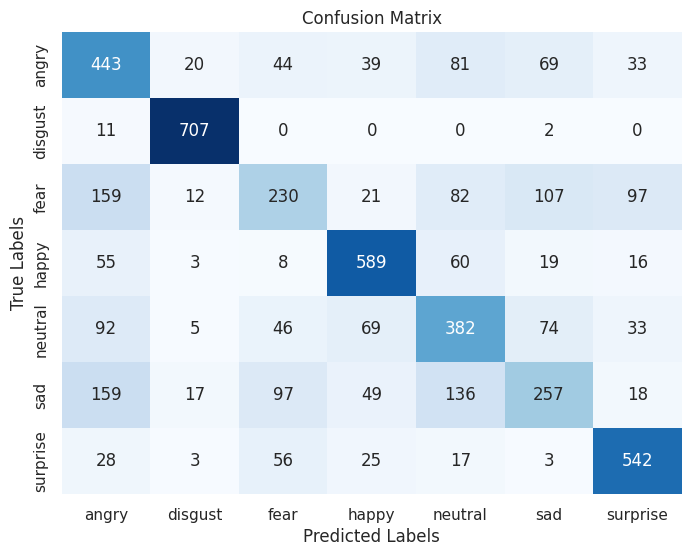

Classification Report:
               precision    recall  f1-score   support

       angry       0.47      0.61      0.53       729
     disgust       0.92      0.98      0.95       720
        fear       0.48      0.32      0.39       708
       happy       0.74      0.79      0.76       750
     neutral       0.50      0.54      0.52       701
         sad       0.48      0.35      0.41       733
    surprise       0.73      0.80      0.77       674

    accuracy                           0.63      5015
   macro avg       0.62      0.63      0.62      5015
weighted avg       0.62      0.63      0.62      5015



In [50]:
acc_vgg19=evaluate_model(model_vgg19, test_ds)


### 3. ResNet50

    Test Loss: 1.32451
Test Accuracy: 49.95%
1/1 [==============================] - 1s 1s/step


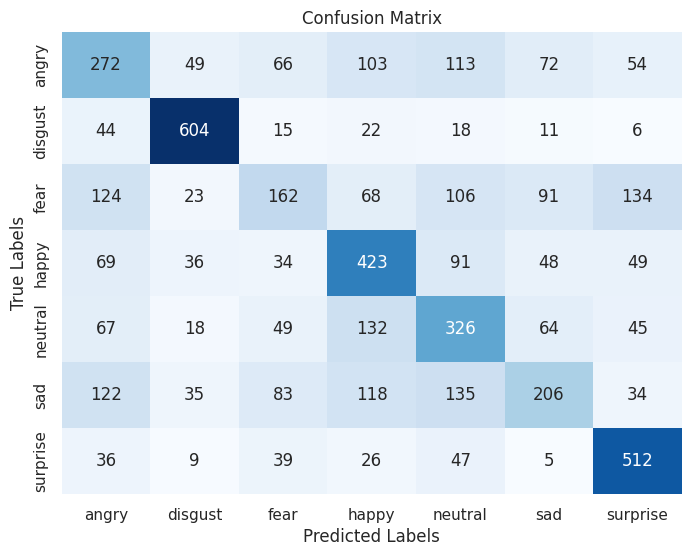

Classification Report:
               precision    recall  f1-score   support

       angry       0.37      0.37      0.37       729
     disgust       0.78      0.84      0.81       720
        fear       0.36      0.23      0.28       708
       happy       0.47      0.56      0.52       750
     neutral       0.39      0.47      0.42       701
         sad       0.41      0.28      0.33       733
    surprise       0.61      0.76      0.68       674

    accuracy                           0.50      5015
   macro avg       0.49      0.50      0.49      5015
weighted avg       0.49      0.50      0.49      5015



In [51]:
acc_resNet50=evaluate_model(model_resNet50, test_ds)


### 4. MobileNetV2

    Test Loss: 1.53766
Test Accuracy: 40.90%
1/1 [==============================] - 1s 775ms/step


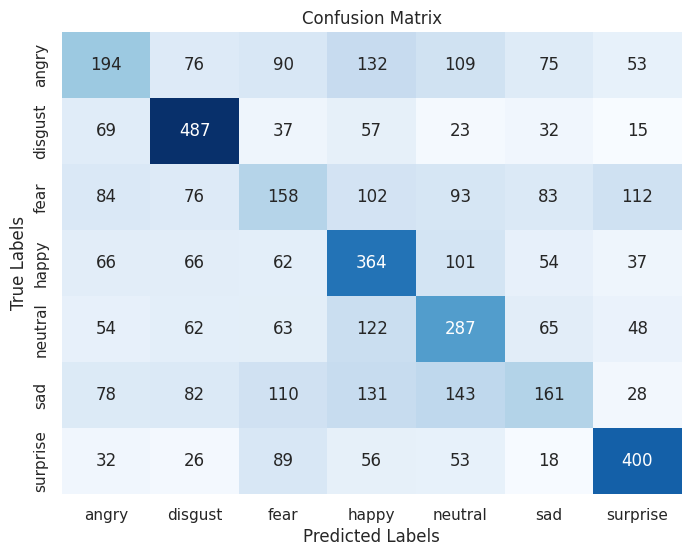

Classification Report:
               precision    recall  f1-score   support

       angry       0.34      0.27      0.30       729
     disgust       0.56      0.68      0.61       720
        fear       0.26      0.22      0.24       708
       happy       0.38      0.49      0.42       750
     neutral       0.35      0.41      0.38       701
         sad       0.33      0.22      0.26       733
    surprise       0.58      0.59      0.59       674

    accuracy                           0.41      5015
   macro avg       0.40      0.41      0.40      5015
weighted avg       0.40      0.41      0.40      5015



In [52]:
acc_mobileNetV2=evaluate_model(model_mobileNetV2, test_ds)



### 5. MY Model

    Test Loss: 0.86984
Test Accuracy: 67.44%
1/1 [==============================] - 0s 140ms/step


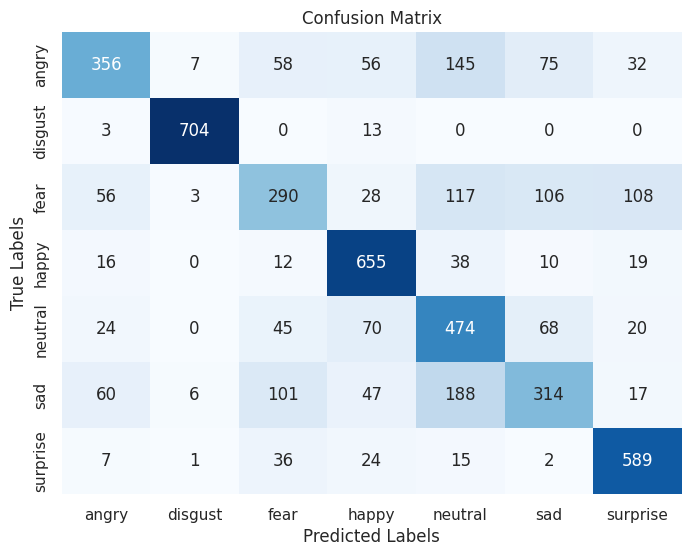

Classification Report:
               precision    recall  f1-score   support

       angry       0.68      0.49      0.57       729
     disgust       0.98      0.98      0.98       720
        fear       0.54      0.41      0.46       708
       happy       0.73      0.87      0.80       750
     neutral       0.49      0.68      0.56       701
         sad       0.55      0.43      0.48       733
    surprise       0.75      0.87      0.81       674

    accuracy                           0.67      5015
   macro avg       0.67      0.68      0.67      5015
weighted avg       0.67      0.67      0.67      5015



In [53]:
acc_my_model=evaluate_model(my_model, test_ds)


# show evaluate models

In [54]:
evaluate_models = {
    "VGG16":acc_vgg16
   , "VGG19":acc_vgg19
   , "ResNet50":acc_resNet50
   , "MobileNetV2":acc_mobileNetV2
   , "MY_Model":acc_my_model
}
df = pd.DataFrame.from_dict(evaluate_models, orient='index')
print(df)


                    0
VGG16        0.645065
VGG19        0.628116
ResNet50     0.499501
MobileNetV2  0.408973
MY_Model     0.674377


# predict

In [55]:

img_path = "/content/surprise3.jpg"
img = cv2.imread(img_path)

# Resize the image to the desired dimensions (e.g., 48x48 pixels)
img = cv2.resize(img, (48, 48))

# Expand the dimensions to match the expected input shape (batch_size=1)
img = np.expand_dims(img, axis=0)

predictions = my_model.predict(img)
print(predictions)
print(predictions[0])
score = tf.nn.softmax(predictions[0])
print(score)
print(f"predict : {class_names[np.argmax(score)]} , {round(100 * np.max(score),2)}")



1/1 [==============================] - 0s 355ms/step
[[4.3598723e-02 1.8212285e-04 6.3553825e-02 7.9181664e-02 1.9706188e-01
  4.3828033e-02 5.7259375e-01]]
[4.3598723e-02 1.8212285e-04 6.3553825e-02 7.9181664e-02 1.9706188e-01
 4.3828033e-02 5.7259375e-01]
tf.Tensor(
[0.12694848 0.12155475 0.1295072  0.13154702 0.14800477 0.1269776
 0.21546023], shape=(7,), dtype=float32)
predict : surprise , 21.55


**Displaying a Batch of Test Data Images with Original and Predicted Labels**

1/1 [==============================] - 0s 18ms/step


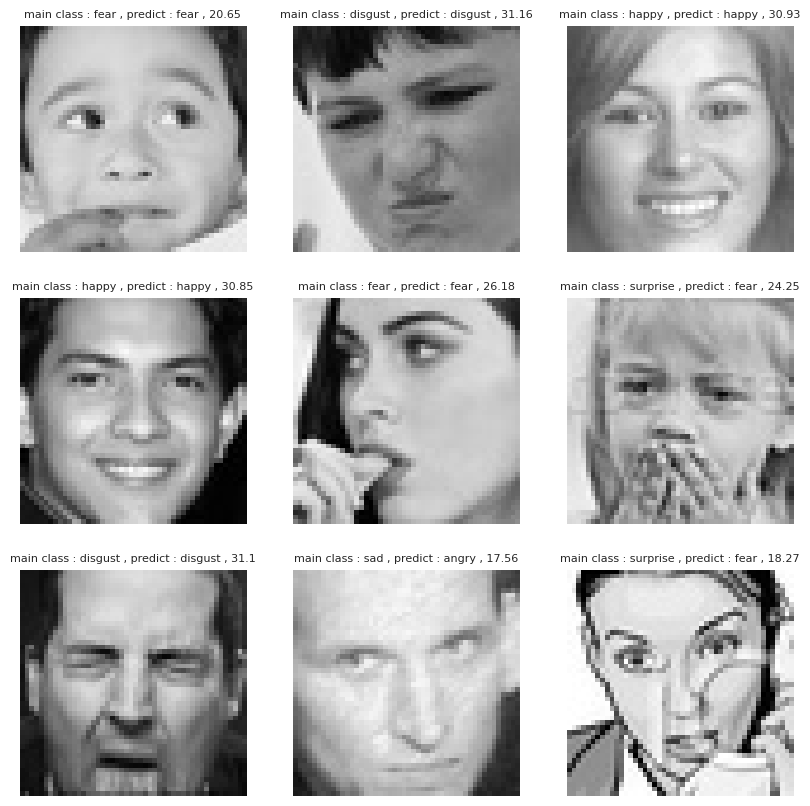

In [56]:

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):  # Take one batch of images
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        predictions = my_model.predict(images)
        score = tf.nn.softmax(predictions[i])
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"main class : {class_names[labels[i]]} , predict : {class_names[np.argmax(score)]} , {round(100 * np.max(score),2)}",fontsize=8, loc="center")
        plt.axis("off")
    plt.show()



**Save model**


In [64]:
my_model.save("my_model.h5")  # Save the model with the extension .h5

